# R1: behavior analysis

for all analyzed participants (not invited participants) <- get sessions from sessions.json

- "looking times": how many trials were attended vs non-attended
- how long was total experiment duration
- how many bad channels before interpolatoin and after interpolation

!! All in relation to age and # visit

Others could only be done with complete new preprocessing and extra saving steps activated:
- ICA: var explained by artifacts
- AR: how many trials/channels affected


In [7]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

base_dir = "/u/kroma/PRAWN/"
os.chdir(base_dir)

import statsmodels.formula.api as smf # LMMs


In [9]:
import statsmodels
statsmodels.__version__

'0.14.0'

get all session infos

In [10]:
sessions = json.load(open("sessions.json"))
sessions = sessions['allsessions_prediction']

get the data from the log jsons

In [11]:
d = {"subject": [],
     "session": [],
     "trials_before_coding": [],
     "trials_after_coding": [],
     "bad_channels_before_interpolation": [],
     "bad_channels_after_interpolation": []}

In [12]:
# DEBUG
#session = "sub-001_ses-001"

for session in sessions:
    data = json.load(open(f"data/interim/{session}/characteristics.json"))    
    d["session"].append(session)
    d["subject"].append(session.split("_")[0])
    d["trials_before_coding"].append(data['n_trials']['before video coding'])
    d["trials_after_coding"].append(data['n_trials']['after video coding'])
    d["bad_channels_before_interpolation"].append(len(data['robust average']['noisy_channels_before_interpolation']['bad_all']))
    d["bad_channels_after_interpolation"].append(len(data['robust average']['noisy_channels_after_interpolation']['bad_all']))

In [13]:
df = pd.DataFrame.from_dict(d)
df["percentage_of_nonattentive_trials"] = 1 - (df["trials_after_coding"] / df["trials_before_coding"]) * 100
df["n_channels_interpolated"] = df["bad_channels_before_interpolation"] - df["bad_channels_after_interpolation"]
df.head()

,subject,session,trials_before_coding,trials_after_coding,bad_channels_before_interpolation,bad_channels_after_interpolation,percentage_of_nonattentive_trials,n_channels_interpolated
0,sub-001,sub-001_ses-001,534,515,4,2,-95.441948,2
1,sub-002,sub-002_ses-001,364,254,10,3,-68.780220,7
2,sub-002,sub-002_ses-002,354,210,7,2,-58.322034,5
3,sub-003,sub-003_ses-001,403,262,7,1,-64.012407,6
4,sub-003,sub-003_ses-002,276,194,3,1,-69.289855,2


merge with age

In [14]:
demo = pd.read_csv("/u/kroma/PRAWN/data/demographics_trials_inclusions.csv")
demo.head()

,sub,ses,sub_ses_str,age,sex,invited,included,trials,incl_session,incl_subject
0,1,1,sub-001_ses-001,13.0,m,True,True,126.0,True,True
1,1,2,sub-001_ses-002,NaN,NaN,False,False,NaN,False,True
2,2,1,sub-002_ses-001,6.0,f,True,True,61.0,True,True
3,2,2,sub-002_ses-002,10.0,f,True,True,47.0,True,True
4,3,1,sub-003_ses-001,8.0,f,True,True,64.0,True,True


In [15]:
df2 = df.merge(demo.drop(["sub", "ses", "incl_session", "incl_subject"], axis=1), how="left", left_on="session", right_on="sub_ses_str")
df2.head()

,subject,session,trials_before_coding,trials_after_coding,bad_channels_before_interpolation,bad_channels_after_interpolation,percentage_of_nonattentive_trials,n_channels_interpolated,sub_ses_str,age,sex,invited,included,trials
0,sub-001,sub-001_ses-001,534,515,4,2,-95.441948,2,sub-001_ses-001,13.0,m,True,True,126.0
1,sub-002,sub-002_ses-001,364,254,10,3,-68.780220,7,sub-002_ses-001,6.0,f,True,True,61.0
2,sub-002,sub-002_ses-002,354,210,7,2,-58.322034,5,sub-002_ses-002,10.0,f,True,True,47.0
3,sub-003,sub-003_ses-001,403,262,7,1,-64.012407,6,sub-003_ses-001,8.0,f,True,True,64.0
4,sub-003,sub-003_ses-002,276,194,3,1,-69.289855,2,sub-003_ses-002,10.0,f,True,True,41.0


## plots

- trials_before_coding: proxy for total experiment length
- trials_after_coding: proxy for attendedness



 --- trials_before_coding --- 



/tmp/ipykernel_29492/1202378020.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_29492/1202378020.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()




 --- trials_after_coding --- 



 --- percentage_of_nonattentive_trials --- 



/tmp/ipykernel_29492/1202378020.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_29492/1202378020.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()




 --- bad_channels_before_interpolation --- 



 --- bad_channels_after_interpolation --- 



/tmp/ipykernel_29492/1202378020.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()




 --- n_channels_interpolated --- 



/tmp/ipykernel_29492/1202378020.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


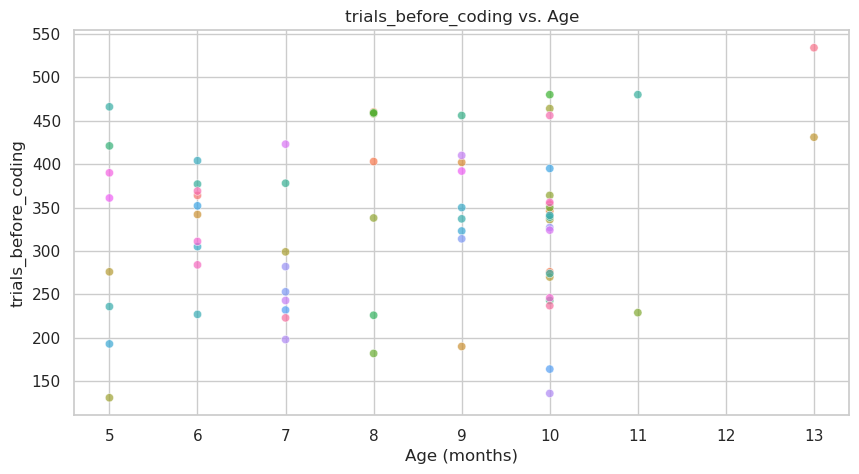

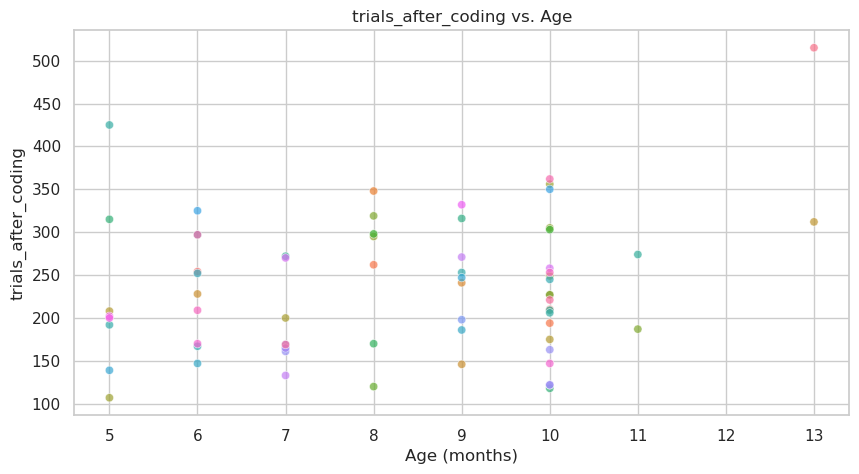

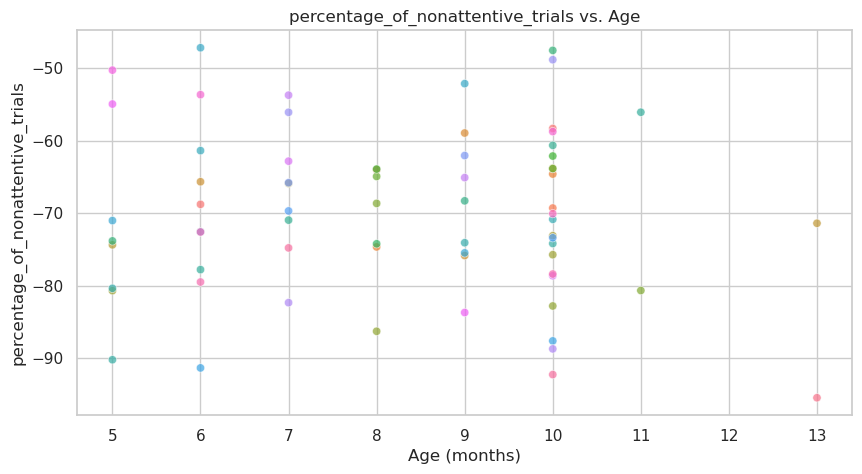

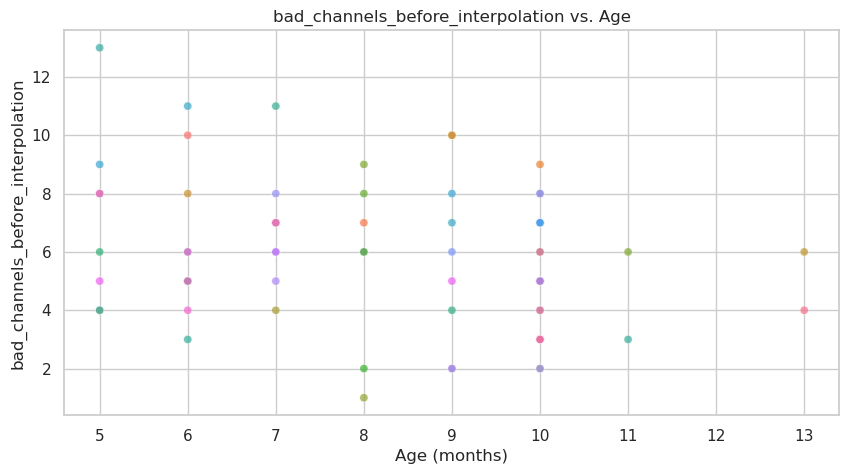

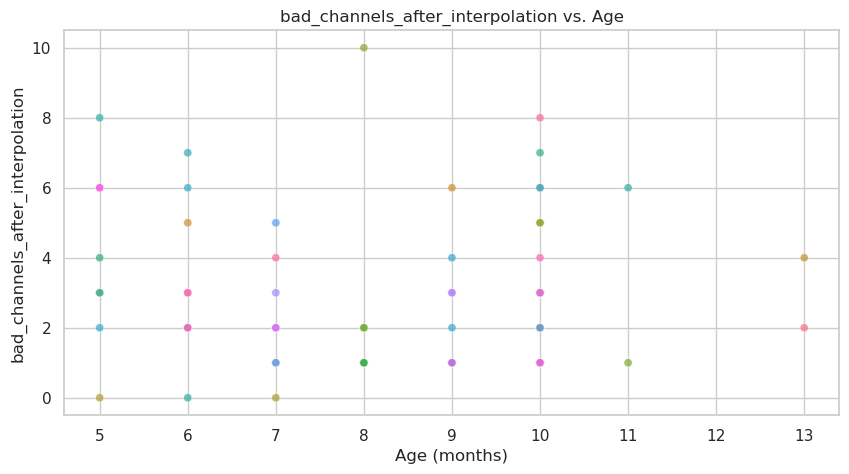

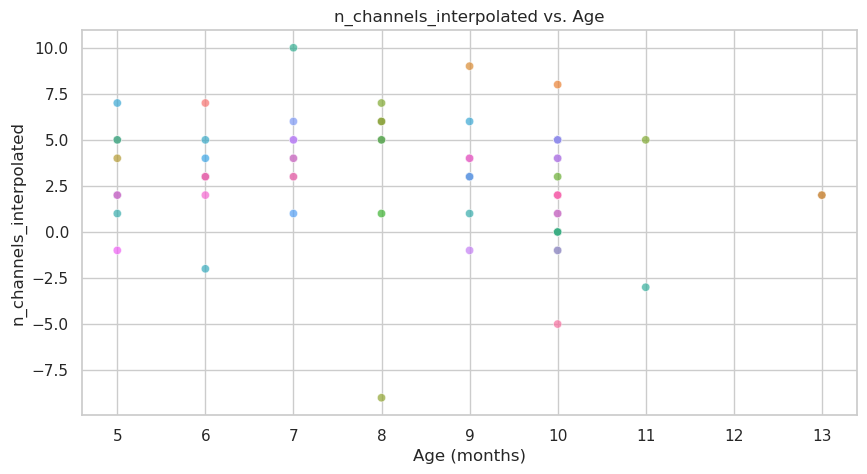

In [16]:
# trial_before_codings vs. age

for dv in ["trials_before_coding", "trials_after_coding", "percentage_of_nonattentive_trials", "bad_channels_before_interpolation", "bad_channels_after_interpolation", "n_channels_interpolated"]:
    print(f"\n\n --- {dv} --- \n")
    plt.figure(figsize=(10, 5))
    sns.set_style("whitegrid")
    sns.set_context("notebook")
    sns.set_palette("colorblind")
    sns.scatterplot(data=df2, x="age", y=dv, hue="subject", alpha=0.7)
    plt.xlabel("Age (months)")
    plt.ylabel(dv)
    plt.title(f"{dv} vs. Age")
    plt.tight_layout()
    # turn off legend
    plt.legend([],[], frameon=False)



In [17]:
for dv in ["trials_before_coding", "trials_after_coding", "percentage_of_nonattentive_trials", "bad_channels_before_interpolation", "bad_channels_after_interpolation", "n_channels_interpolated"]:
    print(f"\n\n --- {dv} --- \n")
    model = smf.mixedlm(f"{dv} ~ age", data=df2, groups="subject")
    result = model.fit()
    print(result.summary())



 --- trials_before_coding --- 

              Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: trials_before_coding
No. Observations: 69      Method:             REML                
No. Groups:       38      Scale:              7650.0476           
Min. group size:  1       Log-Likelihood:     -402.3700           
Max. group size:  2       Converged:          Yes                 
Mean group size:  1.8                                             
--------------------------------------------------------------------
               Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
--------------------------------------------------------------------
Intercept     264.868     45.905   5.770   0.000   174.895   354.841
age             8.022      5.368   1.494   0.135    -2.500    18.544
subject Var   693.329     19.904                                    



 --- trials_after_coding --- 

              Mixed Linear Model Regression Results
Model:      

## Agreement of attention ratings

In [19]:
d = {"subject": [],
     "session": [],
     "dice": []}

for session in sessions:
    data = json.load(open(f"data/interim/{session}/characteristics.json"))    
    d["session"].append(session)
    d["subject"].append(session.split("_")[0])
    d["dice"].append(data['ratings']['soerensen_dice'])

df = pd.DataFrame.from_dict(d)
df.head()

,subject,session,dice
0,sub-001,sub-001_ses-001,0.896034
1,sub-002,sub-002_ses-001,0.912206
2,sub-002,sub-002_ses-002,0.936709
3,sub-003,sub-003_ses-001,0.928425
4,sub-003,sub-003_ses-002,0.849858


In [20]:
print(f"mean dice: {df['dice'].mean()}, std: {df['dice'].std()}")

mean dice: 0.894974619490417, std: 0.113152957518539
